In [ ]:
%matplotlib inline

==========================
MS, 20190404

- Get 2D msftmz (AMOC) data, Calculate maximum of annual mean stream function with CDO

- Result: while numerical values are slightly different than in RTD, year-to-year variations are indistinguishable
- Result: reproduced plot that was made with 2_calc+plot_amoc_old.py (which calculated AMOC strength not with CDO but in python)
- 2_calc+plot_amoc_old2.py: changed order of calculation (maximum of monthly fields, then annual mean); this made a difference
                              and brought the results out of line of that in the RTD



In [3]:
basedir='/home/rms101/SCRIPTS/amoc_stab/'
import sys
sys.path.append(basedir + 'MODS')
import os
import cmipdata as cd
import numpy as np
import matplotlib.pyplot as plt # for basic plotting
import rms_plots as rpl
import rms_utils as rut
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
################settings
#mpl.style.reload_library()
#plt.style.use('rms_paper')

#rundir='/HOME/rms/SCRIPTS/6_OTHER/6PARIS-STAB/1TS/AMOC/';os.chdir(rundir)

registering cmaps
registering cmaps


1a. Calculate AMOC timeseries LE
#####################################################

In [7]:
rundir='/home/rms101/SCRIPTS/amoc_stab/FIG1_GMST+AMOC/';os.chdir(rundir)
srcdir_base='/space/hall3/sitestore/eccc/crd/cetus3_data/CCCma_Output'    
datadir='/space/hall3/sitestore/eccc/crd/ccrn/users/rms101/DATA/amoc_stab_post'
do_calc=True
varnm='msftmyz'
if do_calc:
    os.system('mkdir -p {}/DATA_{}_canesm2'.format(datadir,varnm))
    os.chdir('{}/DATA_{}_canesm2'.format(datadir,varnm))
    os.system('/bin/rm *.nc')

    # all historical 
    os.system('ln -s ' + srcdir_base +'/CanSISE/output/CCCma/CanESM2/historical-r*/mon/ocean/'+varnm+'/*/*.nc .')
    os.system('ln -s ' + srcdir_base +'/LOWWARMING/output/CCCma/CanESM2/lowwarming15/mon/ocean/'+varnm+'/*/*.nc .')
    os.system('ln -s ' + srcdir_base +'/LOWWARMING/output/CCCma/CanESM2/lowwarming20/mon/ocean/'+varnm+'/*/*.nc .')
    os.system('ln -s ' + srcdir_base +'/LOWWARMING/output/CCCma/CanESM2/lowwarming30/mon/ocean/'+varnm+'a/*/*.nc .')

    # concat
    ens_his = cd.mkensemble('*historical-r*')
    ens_his = cd.cat_exp_slices(ens_his)
    ens_15c1 = cd.mkensemble('*lowwarming15*_r*i1p1_20??01-2???12.nc') #all up to 2100
    ens_15c1 = cd.cat_exp_slices(ens_15c1)
    ens_15c2 = cd.mkensemble('*lowwarming15*_r[1-5]i1p1_2[1-6]??01-2???12.nc') #1-5 past 2100
    ens_15c2 = cd.cat_exp_slices(ens_15c2)
    ens_20c1 = cd.mkensemble('*lowwarming20*_r*i1p1_20??01-2???12.nc') #all up to 2100
    ens_20c1 = cd.cat_exp_slices(ens_20c1)
    ens_20c2 = cd.mkensemble('*lowwarming20*_r[1-5]i1p1_2[1-6]??01-2???12.nc') #1-5 past 2100
    ens_20c2 = cd.cat_exp_slices(ens_20c2)
    ens_30c1 = cd.mkensemble('*lowwarming30*_r*i1p1_20??01-2???12.nc') #all up to 2100
    ens_30c1 = cd.cat_exp_slices(ens_30c1)
    ens_30c2 = cd.mkensemble('*lowwarming30*_r[1-5]i1p1_2[1-6]??01-2???12.nc') #1-5 past 2100
    ens_30c2 = cd.cat_exp_slices(ens_30c2)


    # annual global means            
    print 'Calculating annual mean psi'
    my_cdo_str='cdo -yearmean {infile} {outfile}' 
    ens_his_am=cd.my_operator(ens_his, my_cdo_str, output_prefix='am_',delete=True)
    ens_15c1_am=cd.my_operator(ens_15c1, my_cdo_str, output_prefix='am_',delete=True)
    ens_15c2_am=cd.my_operator(ens_15c2, my_cdo_str, output_prefix='am_',delete=True)
    ens_20c1_am=cd.my_operator(ens_20c1, my_cdo_str, output_prefix='am_',delete=True)
    ens_20c2_am=cd.my_operator(ens_20c2, my_cdo_str, output_prefix='am_',delete=True)
    ens_30c1_am=cd.my_operator(ens_30c1, my_cdo_str, output_prefix='am_',delete=True)
    ens_30c2_am=cd.my_operator(ens_30c2, my_cdo_str, output_prefix='am_',delete=True)
    # Select NH, Atlantic basin            
    print 'Select NH, Atlantic basin'
    my_ncks_str='ncks -d basin,0 -d lat,117,191 {infile} {outfile}' ; prefix='nh_'
    ens_his_am_nh=cd.my_operator(ens_his_am, my_ncks_str, output_prefix='nh_',delete=True)
    ens_15c1_am_nh=cd.my_operator(ens_15c1_am, my_ncks_str, output_prefix='nh_',delete=True)
    ens_15c2_am_nh=cd.my_operator(ens_15c2_am, my_ncks_str, output_prefix='nh_',delete=True)
    ens_20c1_am_nh=cd.my_operator(ens_20c1_am, my_ncks_str, output_prefix='nh_',delete=True)
    ens_20c2_am_nh=cd.my_operator(ens_20c2_am, my_ncks_str, output_prefix='nh_',delete=True)
    my_ncks_str='ncks -d lat,117,191 {infile} {outfile}' ; prefix='nh_'
    ens_30c1_am_nh=cd.my_operator(ens_30c1_am, my_ncks_str, output_prefix='nh_',delete=True)
    ens_30c2_am_nh=cd.my_operator(ens_30c2_am, my_ncks_str, output_prefix='nh_',delete=True)

    print 'Calculate maximum psi, convert to volume'
    # Max, and convert from mass (kg/s to volume [Sv])            
    my_cdo_str='cdo -divc,1.025e9 -vertmax -fldmax {infile} {outfile}' ; prefix='amoc_'
    ens_his_amoc=cd.my_operator(ens_his_am_nh, my_cdo_str, output_prefix=prefix,delete=True)
    ens_15c1_amoc=cd.my_operator(ens_15c1_am_nh, my_cdo_str, output_prefix=prefix,delete=True)
    ens_15c2_amoc=cd.my_operator(ens_15c2_am_nh, my_cdo_str, output_prefix=prefix,delete=True)
    ens_20c1_amoc=cd.my_operator(ens_20c1_am_nh, my_cdo_str, output_prefix=prefix,delete=True)
    ens_20c2_amoc=cd.my_operator(ens_20c2_am_nh, my_cdo_str, output_prefix=prefix,delete=True)
    ens_30c1_amoc=cd.my_operator(ens_30c1_am_nh, my_cdo_str, output_prefix=prefix,delete=True)
    ens_30c2_amoc=cd.my_operator(ens_30c2_am_nh, my_cdo_str, output_prefix=prefix,delete=True)

else:
    os.chdir('DATA_{}_canesm2'.format(varnm))
    ens_his_amoc = cd.mkensemble('amoc_nh_am_*historical-r*',prefix='amoc_nh_am_')
    ens_15c1_amoc = cd.mkensemble('amoc_nh_am_*lowwarming15*_r*i1p1_20??01-2???12.nc',prefix='amoc_nh_am_') #all up to 2100
    ens_15c2_amoc = cd.mkensemble('amoc_nh_am_*lowwarming15*_r[1-5]i1p1_2[1-6]??01-2???12.nc',prefix='amoc_nh_am_') #1-5 past 2100
    ens_20c1_amoc = cd.mkensemble('amoc_nh_am_*lowwarming20*_r*i1p1_20??01-2???12.nc',prefix='amoc_nh_am_') #all up to 2100
    ens_20c2_amoc = cd.mkensemble('amoc_nh_am_*lowwarming20*_r[1-5]i1p1_2[1-6]??01-2???12.nc',prefix='amoc_nh_am_') #1-5 past 2100
    ens_30c1_amoc = cd.mkensemble('amoc_nh_am_*lowwarming30*_r*i1p1_20??01-2???12.nc',prefix='amoc_nh_am_') #all up to 2100
    ens_30c2_amoc = cd.mkensemble('amoc_nh_am_*lowwarming30*_r[1-5]i1p1_2[1-6]??01-2???12.nc',prefix='amoc_nh_am_') #1-5 past 2100

amoc_his=cd.loadfiles(ens_his_amoc,varnm)['data']
amoc_15c1=cd.loadfiles(ens_15c1_amoc,varnm)['data']
amoc_20c1=cd.loadfiles(ens_20c1_amoc,varnm)['data']
amoc_30c1=cd.loadfiles(ens_30c1_amoc,'msftmyza')['data']

amoc_15c2=cd.loadfiles(ens_15c2_amoc,varnm)['data']
amoc_20c2=cd.loadfiles(ens_20c2_amoc,varnm)['data']
amoc_30c2=cd.loadfiles(ens_30c2_amoc,'msftmyza')['data']

os.chdir('../')
#Years#############################################
years_his=np.arange(1950,2100+1)
years_15c1=np.arange(2021,2100+1)
years_20c1=np.arange(2036,2100+1)
years_30c1=np.arange(2061,2100+1)
years2=np.arange(2101,2600+1)
years_his_pre30c=np.arange(1950,2061)
amoc_his_pre30c=amoc_his[:,0:rut.find_nearest(years_his,2061)]
os.chdir(rundir)


This ensemble contains:
1 variables
1 models
5 experiments
50 realizations
100 ncfiles

 For more details use ens.fulldetails() 

joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
joining files
This ensemble contains:
1 variables
1 models
1 experiments
50 realizations
100 ncfiles

 For more details use ens.fulldetails() 

joining files
joining files
joining file

2. Plot (mean)
#####################################################

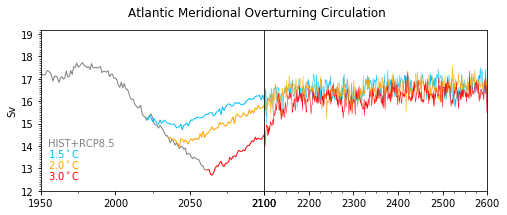

In [8]:
fig1, axs = plt.subplots(1,2, figsize=(8,8)); 
fig1.subplots_adjust(bottom=0.6,wspace=0)

#1950-2100############################################
ax=axs[0]
ax.set_xlim([1950, 2100]) 
    
ax.set_xticks(np.arange(1950,2125,25))
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_minor_locator(MultipleLocator(25)) 

ax.set_ylim([12, 19.2])
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_ylabel('Sv')
    
####### plot
##his##

kwargs={'linewidth': 1, 'color': 'gray'}
ax.plot(years_his_pre30c,np.mean(amoc_his_pre30c,axis=0),**kwargs)  
#kwargs={'color':'gray', 'alpha': 0.25, 'edgecolor':'none'}
#ax.fill_between(years_his_pre30c,np.min(amoc_his_pre30c,axis=0), np.max(amoc_his_pre30c,axis=0),**kwargs)
                                
##15c##
kwargs={'linewidth': 1, 'color': 'deepskyblue'}
ax.plot(years_15c1,np.mean(amoc_15c1,axis=0),**kwargs)
#kwargs={'color':'deepskyblue', 'alpha': 0.25, 'edgecolor':'none'}
#ax.fill_between(years_15c1,np.min(amoc_15c1,axis=0), np.max(amoc_15c1,axis=0),**kwargs)

##20c##
kwargs={'linewidth': 1, 'color': 'orange'}
ax.plot(years_20c1,np.mean(amoc_20c1,axis=0),**kwargs)
#kwargs={'color':'orange', 'alpha': 0.25, 'edgecolor':'none'}
#ax.fill_between(years_20c1,np.min(amoc_20c1,axis=0), np.max(amoc_20c1,axis=0),**kwargs)

##30c##
kwargs={'linewidth': 1, 'color': 'red'}
ax.plot(years_30c1,np.mean(amoc_30c1,axis=0),**kwargs)
#kwargs={'color':'red', 'alpha': 0.25, 'edgecolor':'none'}
#ax.fill_between(years_30c1,np.min(amoc_30c1,axis=0), np.max(amoc_30c1,axis=0),**kwargs)

##linesc##
#ax.axhline(y=0,color="black",linewidth=0.5)


##legend##

ax.text(1955,14,'HIST+RCP8.5',color= 'gray')
ax.text(1955,13.5,'1.5$^\circ$C',color= 'deepskyblue')
ax.text(1955,13,'2.0$^\circ$C',color= 'orange')
ax.text(1955,12.5,'3.0$^\circ$C',color= 'red')
#2100-2600############################################
ax=axs[1]
ax.set_xlim([2100, 2600]) 
ax.set_xticks=np.arange(2200,2700,100) 
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(MultipleLocator(25)) 

ax.set_ylim([12, 19.2])
#ax.yaxis.set_major_locator(MultipleLocator(1))
#ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_yticklabels((''))
ax.yaxis.set_tick_params(length=0,width=0)
####### plot                                
##15c##
kwargs={'linewidth': 0.5, 'color': 'deepskyblue'}
ax.plot(years2,np.mean(amoc_15c2,axis=0),**kwargs)
#kwargs={'color':'deepskyblue', 'alpha': 0.25, 'edgecolor':'none'}
#ax.fill_between(years2,np.min(amoc_15c2,axis=0), np.max(amoc_15c2,axis=0),**kwargs)

##20c##
kwargs={'linewidth': 0.5, 'color': 'orange'}
ax.plot(years2,np.mean(amoc_20c2,axis=0),**kwargs)
#kwargs={'color':'orange', 'alpha': 0.25, 'edgecolor':'none'}
#ax.fill_between(years2,np.min(amoc_20c2,axis=0), np.max(amoc_20c2,axis=0),**kwargs)

##30c##
kwargs={'linewidth': 0.5, 'color': 'red'}
ax.plot(years2,np.mean(amoc_30c2,axis=0),**kwargs)
#kwargs={'color':'red', 'alpha': 0.25, 'edgecolor':'none'}
#ax.fill_between(years2,np.min(amoc_30c2,axis=0), np.max(amoc_30c2,axis=0),**kwargs)

##linesc##
ax.axhline(y=0,color="black",linewidth=0.5)


#title and save############################################
fig1.suptitle('Atlantic Meridional Overturning Circulation',y=0.92)
#ax.text(2080,10.5,'Year')
#rpl.add_title(ax,'AMOC (50 runs, ensemble mean)')
rpl.mysavefig(fig1,'PLOTS/fig1b_AMOC_canesm2.png')



